In [313]:
# Import Data Manipulation Library
import pandas as pd
import numpy as np
# Import Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import Filter Warnings Library
import warnings
warnings.filterwarnings('ignore')
# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log',force = True)
# Import Sci-kit Learn Libraries for Model Building
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
# Importing Metrics for Regression Model
from sklearn.metrics import accuracy_score,confusion_matrix

In [314]:
# Importing Dataset 
df = pd.read_csv('bank .csv')
df.sample(frac = 1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2553,33,management,married,tertiary,no,1064,yes,no,cellular,13,may,562,1,-1,0,unknown,yes
2119,31,unemployed,married,tertiary,no,591,no,no,cellular,21,nov,161,2,-1,0,unknown,no
910,40,blue-collar,married,secondary,no,952,no,yes,unknown,12,jun,140,1,-1,0,unknown,no
824,39,technician,married,tertiary,no,794,no,no,telephone,2,feb,182,1,-1,0,unknown,no
1701,29,unemployed,single,secondary,no,486,no,no,telephone,30,apr,95,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,27,admin.,married,secondary,no,-247,yes,yes,unknown,4,jun,344,2,-1,0,unknown,no
289,34,admin.,married,tertiary,no,69,no,yes,cellular,4,aug,120,3,1,6,success,yes
3445,48,technician,married,secondary,no,427,no,no,unknown,14,may,201,1,-1,0,unknown,no
1310,37,student,married,unknown,no,0,no,no,unknown,18,jun,115,1,-1,0,unknown,no


In [315]:
# Checking Data Columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [316]:
# Evaluate Descriptive stats : EDA 

# Step 1: Segreate Categorical Columns and Numerical Column 
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(include = ['int64','float64'])

In [317]:
numerical_col

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [318]:
categorical_col

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


In [319]:
# step 2: Evaluate Descriptive Stats
# Univariate Analysis 
'''
step 1: Create a blank list : stats = []
step 2: Using OrderedDict create dictionary 
step 3: Append the list : stats[]
step 4: Append list : stats[] converted to DataFrame : Report
'''
from collections import OrderedDict 

stats=[]

for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Mode':df[i].mode()[0],
        'Maximum':df[i].max(),
        'Minimum':df[i].min(),
        'variance':df[i].var(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),
        'Kurtosis':df[i].kurt()
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

,Feature,Mean,Median,Mode,Maximum,Minimum,variance,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,age,41.170095,39.0,34,87,19,1.118562e+02,33.0,49.0,16.0,10.576211,0.699501,0.348775
1,balance,1422.657819,444.0,0,71188,-3313,9.057922e+06,69.0,1480.0,1411.0,3009.638142,6.596431,88.390332
2,day,15.915284,16.0,20,31,1,6.802402e+01,9.0,21.0,12.0,8.247667,0.094627,-1.039531
3,duration,263.961292,185.0,123,3025,4,6.752547e+04,104.0,329.0,225.0,259.856633,2.772420,12.530050
4,campaign,2.793630,2.0,1,50,1,9.670897e+00,1.0,3.0,2.0,3.109807,4.743914,37.168920
5,pdays,39.766645,-1.0,-1,871,-1,1.002424e+04,-1.0,-1.0,0.0,100.121124,2.717071,7.957128
6,previous,0.542579,0.0,0,25,0,2.868153e+00,0.0,0.0,0.0,1.693562,5.875259,51.995212


In [320]:
'''
Note:
# Logistic Regression always works on Sigmoid Function 
# whenever u r doing descriptive statistics IQR of any column cannot be zero.It signifies that such column will not
contribute in machine learning Performance
1. Positive Kurtosis: LeptoKurtic
2. Normal Distribution : MesoKurtic
3. Negative Distribution: PlatyKurtic
......................................
1. Positive Skewness: mode<median<mean
2. No Skewness: Normally Distributed: mean = median = mode
3. Negative Skewness: mean<median<mode
'''


'\nNote:\n# Logistic Regression always works on Sigmoid Function \n# whenever u r doing descriptive statistics IQR of any column cannot be zero.It signifies that such column will not\ncontribute in machine learning Performance\n1. Positive Kurtosis: LeptoKurtic\n2. Normal Distribution : MesoKurtic\n3. Negative Distribution: PlatyKurtic\n......................................\n1. Positive Skewness: mode<median<mean\n2. No Skewness: Normally Distributed: mean = median = mode\n3. Negative Skewness: mean<median<mode\n'

# Problem Definition

In [322]:
''' 
The Dataset consist of 4521 rows and 17 columns. This dataset belongs to portugal bank where 
our aim is to classify whether the customer will subscribe the bank term deposite or not.

Type of machine learning model: Binary Classification 

Above Dataset is a type of Multivariate Analysis.

X: Independent Columns
y: Target column / dependent Column

Here , y acts as Target column / dependent Column 
'''

' \nThe Dataset consist of 4521 rows and 17 columns. This dataset belongs to portugal bank where \nour aim is to classify whether the customer will subscribe the bank term deposite or not.\n\nType of machine learning model: Binary Classification \n\nAbove Dataset is a type of Multivariate Analysis.\n\nX: Independent Columns\ny: Target column / dependent Column\n\nHere , y acts as Target column / dependent Column \n'

In [323]:
# Checking the distribution of people who subscibe the term deposite 
''' 
Based on distribution of target column , we found that the data is imbalance
'''
df['y'].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

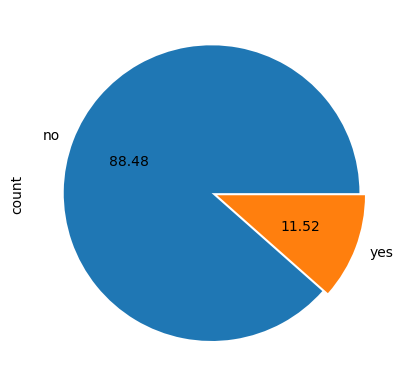

In [324]:
df['y'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode = [0.02,0.02])
plt.show()

# Data Insights

In [326]:
'''
1. 88.48% people did not subscribe bank term deposite .
2. The Average call duration record is 264 seconds.This can be one of the cause for 
the people who have not subscribed the bank deposite.
3. If the call duration is more than 300 seconds the chances are there that person 
will subscribe the bank term deposite.
4.The Target Audience is Divorced People on call.
5. The people who have taken loan are excluded from the Bank term deposite subscription. 
6. The peole who have housing loan are excluded from then bank term deposite subcription. 
'''
df['duration'].mean()

263.96129174961294

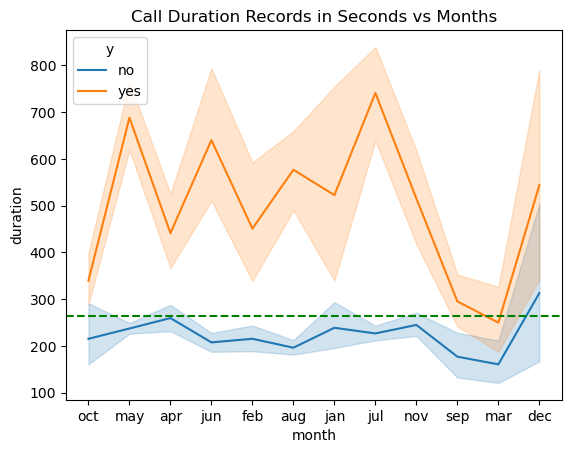

In [327]:
sns.lineplot(x = df['month'], y = df['duration'],hue = df['y'])
plt.axhline(df['duration'].mean(),linestyle = '--',color = 'green')
plt.title('Call Duration Records in Seconds vs Months')
plt.show()

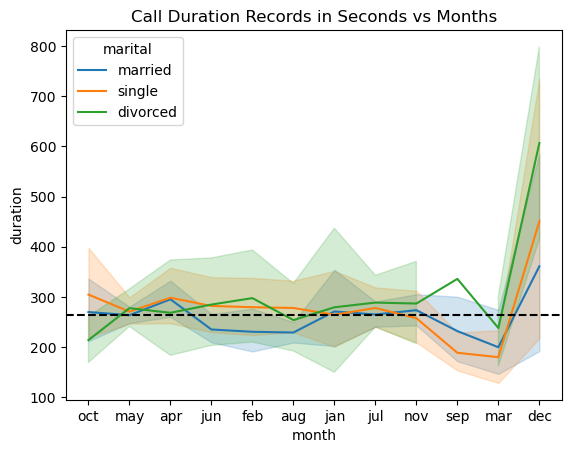

In [328]:
sns.lineplot(x = df['month'], y = df['duration'],hue = df['marital'])
plt.axhline(df['duration'].mean(),linestyle = '--',color = 'black')
plt.title('Call Duration Records in Seconds vs Months')
plt.show()

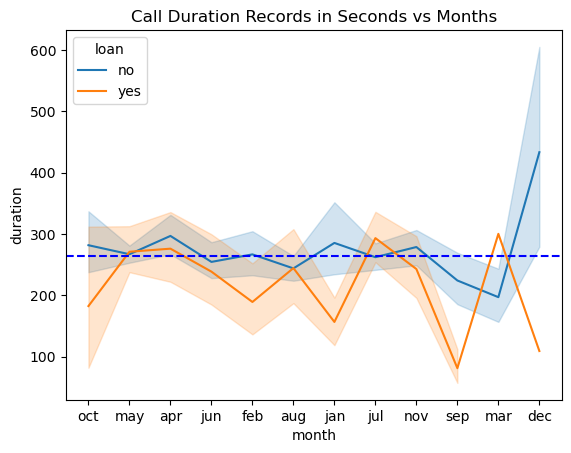

In [329]:
sns.lineplot(x = df['month'], y = df['duration'],hue = df['loan'])
plt.axhline(df['duration'].mean(),linestyle = '--',color = 'b')
plt.title('Call Duration Records in Seconds vs Months')
plt.show()

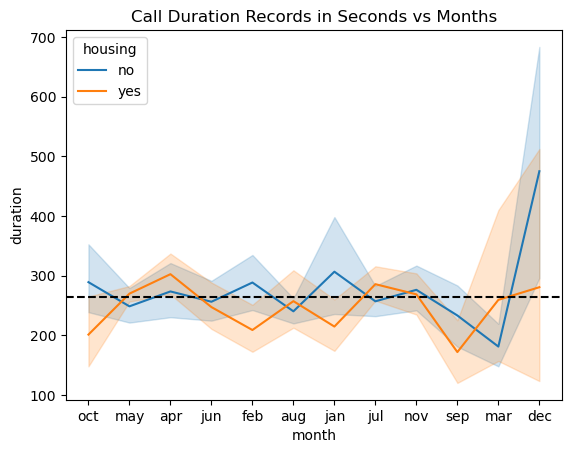

In [330]:
sns.lineplot(x = df['month'], y = df['duration'],hue = df['housing'])
plt.axhline(df['duration'].mean(),linestyle = '--',color = 'black')
plt.title('Call Duration Records in Seconds vs Months')
plt.show()

In [331]:
df['job'].value_counts()


job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

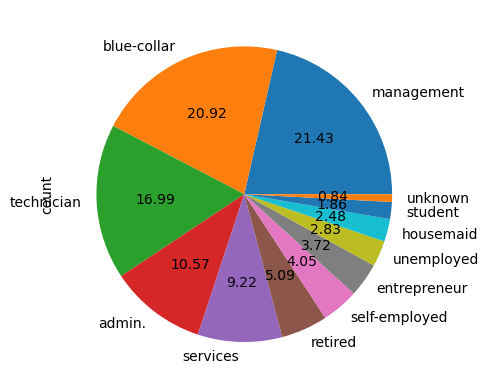

In [332]:
#Distribution based on jobs
df['job'].value_counts().plot(kind = 'pie',autopct = '%1.2f')
plt.show()

In [333]:
management = df[df['job'] == 'management']
bluecollar = df[df['job'] == 'blue-collar']

In [334]:
management

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
15,40,management,married,tertiary,no,194,no,yes,cellular,29,aug,189,2,-1,0,unknown,no
20,38,management,divorced,unknown,no,0,yes,no,cellular,18,nov,96,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4484,38,management,married,tertiary,no,3436,no,no,cellular,21,nov,663,4,-1,0,unknown,yes
4489,45,management,married,tertiary,no,6945,no,no,cellular,5,aug,131,5,356,3,failure,no
4495,48,management,married,tertiary,no,1175,yes,no,telephone,18,nov,1476,3,-1,0,unknown,no
4498,31,management,married,tertiary,no,1183,yes,no,unknown,27,may,676,6,-1,0,unknown,no


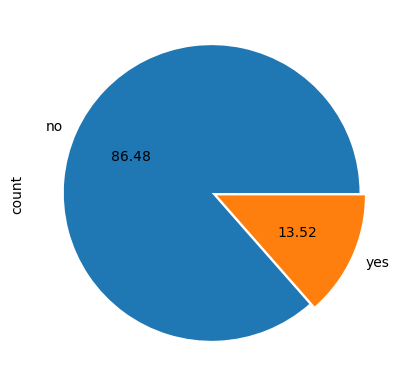

In [335]:
management['y'].value_counts().plot(kind = 'pie' , autopct = '%1.2f',explode = [0.02 , 0.02])
plt.show()

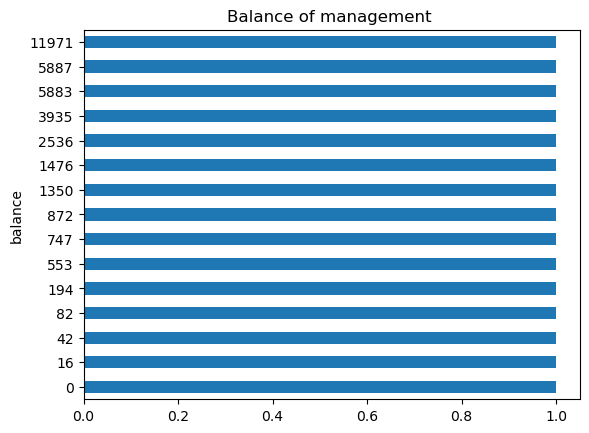

In [336]:
 management['balance'][:15].sort_values(ascending = True).value_counts().plot(kind = 'barh')
plt.title('Balance of management ')
plt.show()

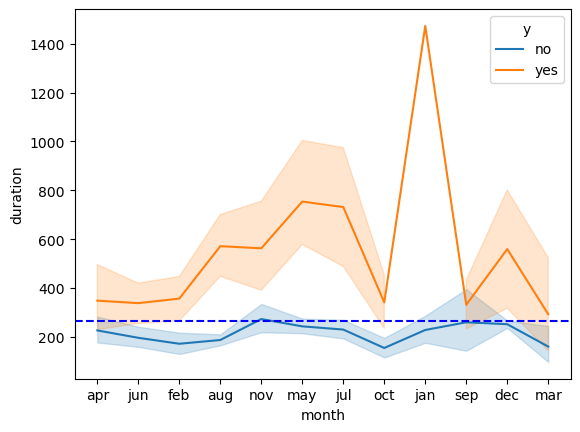

In [337]:
sns.lineplot(x = management['month'],y = management['duration'],hue = management['y'])
plt.axhline(264,linestyle = '--', c = 'b')
plt.show()

In [338]:
bluecollar = df[df['job'] == 'blue-collar']

In [339]:
bluecollar

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
14,31,blue-collar,married,secondary,no,360,yes,yes,cellular,29,jan,89,1,241,1,failure,no
18,25,blue-collar,single,primary,no,-221,yes,no,unknown,23,may,250,1,-1,0,unknown,no
26,55,blue-collar,married,primary,no,627,yes,no,unknown,5,may,247,1,-1,0,unknown,no
37,32,blue-collar,married,secondary,no,2089,yes,no,cellular,14,nov,132,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4511,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes
4512,40,blue-collar,married,secondary,no,1100,yes,no,unknown,29,may,660,2,-1,0,unknown,no
4513,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no


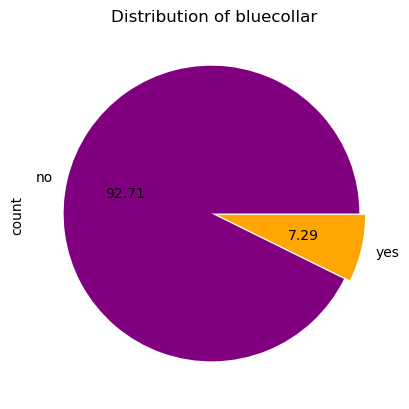

In [340]:
bluecollar['y'].value_counts().plot(kind = 'pie' , autopct = '%1.2f',explode = [0.02 , 0.02],colors = ['purple','orange'])
plt.title('Distribution of bluecollar')
plt.show()

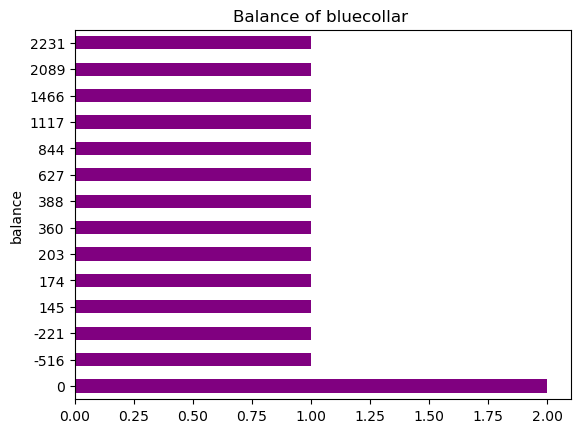

In [341]:
bluecollar['balance'][:15].sort_values(ascending = True).value_counts().plot(kind = 'barh',color = 'purple')
plt.title('Balance of bluecollar ')
plt.show()

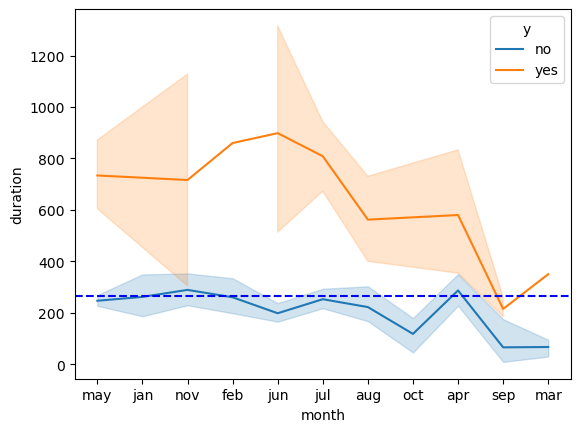

In [342]:
sns.lineplot(x = bluecollar['month'],y = bluecollar['duration'],hue = bluecollar['y'])
plt.axhline(264,linestyle = '--', c = 'b')
plt.show()

In [343]:
Admin = df[df['job'] == 'admin.']

In [344]:
Admin

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
11,43,admin.,married,secondary,no,264,yes,no,cellular,17,apr,113,2,-1,0,unknown,no
17,37,admin.,single,tertiary,no,2317,yes,no,cellular,20,apr,114,1,152,2,failure,no
29,53,admin.,married,secondary,no,105,no,yes,cellular,21,aug,74,2,-1,0,unknown,no
35,42,admin.,divorced,secondary,no,1811,yes,no,unknown,14,may,150,1,-1,0,unknown,no
49,61,admin.,married,unknown,no,4629,yes,no,cellular,27,jan,181,1,92,1,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,46,admin.,married,secondary,no,466,yes,no,cellular,29,jan,169,1,-1,0,unknown,no
4490,58,admin.,married,secondary,no,3496,yes,no,unknown,2,jun,111,4,-1,0,unknown,no
4500,38,admin.,married,secondary,no,4196,yes,no,cellular,12,may,193,2,-1,0,unknown,no
4505,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes


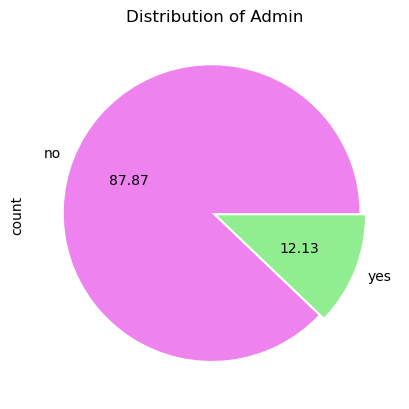

In [345]:
Admin['y'].value_counts().plot(kind = 'pie' , autopct = '%1.2f',explode = [0.02 , 0.02],colors=['violet', 'lightgreen'])
plt.title('Distribution of Admin')
plt.show()

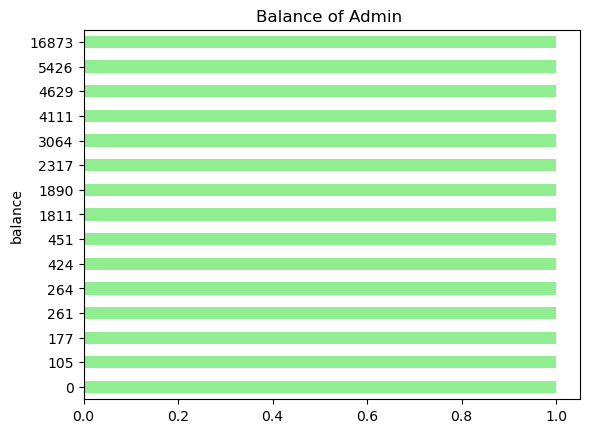

In [346]:
Admin['balance'][:15].sort_values(ascending = True).value_counts().plot(kind = 'barh',color ='lightgreen')
plt.title('Balance of Admin ')
plt.show()

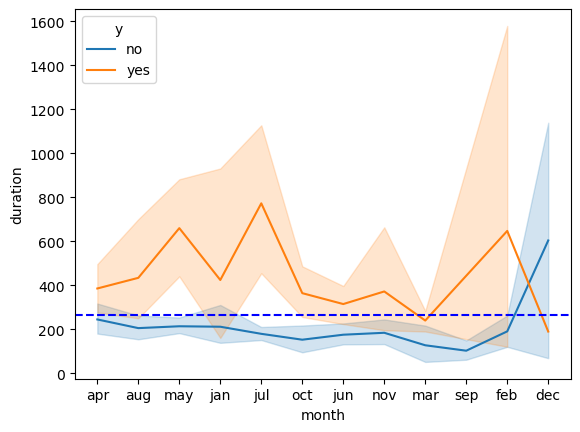

In [347]:
sns.lineplot(x = Admin['month'],y = Admin['duration'],hue = Admin['y'])
plt.axhline(264,linestyle = '--', c = 'b')
plt.show()

In [348]:
Technician = df[df['job'] == 'technician']

In [349]:
Technician

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
12,36,technician,married,tertiary,no,1109,no,no,cellular,13,aug,328,2,-1,0,unknown,no
16,56,technician,married,secondary,no,4073,no,no,cellular,27,aug,239,5,-1,0,unknown,no
31,31,technician,married,secondary,no,171,no,no,cellular,27,aug,81,3,-1,0,unknown,no
34,49,technician,married,tertiary,no,1235,no,no,cellular,13,aug,354,3,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493,28,technician,single,tertiary,no,0,yes,no,unknown,4,jun,205,6,-1,0,unknown,no
4494,26,technician,single,secondary,no,668,yes,no,unknown,28,may,576,3,-1,0,unknown,yes
4509,51,technician,married,tertiary,no,2506,no,no,cellular,30,nov,210,3,-1,0,unknown,no
4510,36,technician,divorced,secondary,no,566,yes,no,unknown,20,may,129,2,-1,0,unknown,no


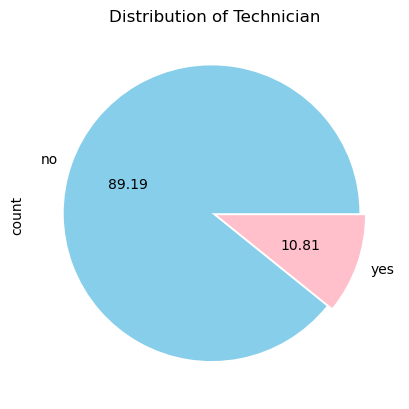

In [350]:
Technician['y'].value_counts().plot(kind = 'pie' , autopct = '%1.2f',explode = [0.02 , 0.02],colors=['skyblue', 'pink'])
plt.title('Distribution of Technician')
plt.show()

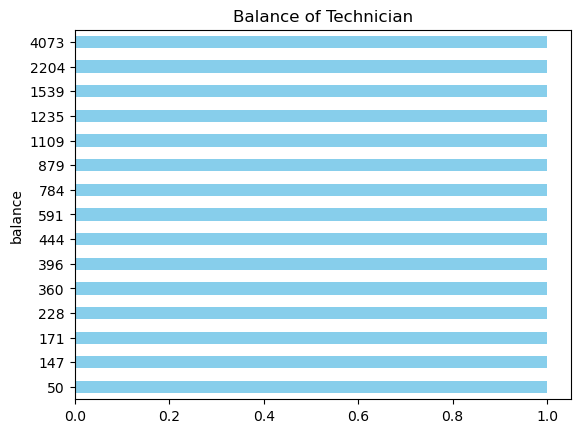

In [351]:
Technician['balance'][:15].sort_values(ascending = True).value_counts().plot(kind = 'barh',color ='skyblue')
plt.title('Balance of Technician')
plt.show()

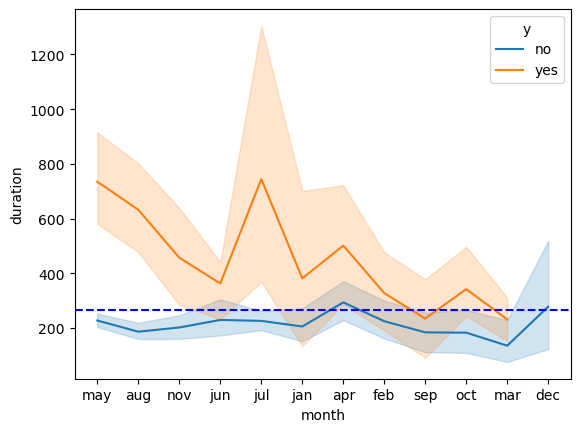

In [352]:
sns.lineplot(x = Technician['month'],y = Technician['duration'],hue = Technician['y'])
plt.axhline(264,linestyle = '--', c = 'b')
plt.show()

In [353]:
''' 
1. pdays and previous these two columns shows IQR = 0 , Hence we need to drop these two columns 
from the dataset 
'''
# Create Copy of df
data = df.copy()
data.sample(frac = 1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3671,37,blue-collar,married,secondary,no,67,no,no,unknown,3,jun,45,2,-1,0,unknown,no
995,38,blue-collar,married,secondary,no,1370,yes,no,cellular,11,may,472,2,-1,0,unknown,no
529,40,management,married,tertiary,no,1584,yes,no,telephone,21,nov,661,1,-1,0,unknown,no
1750,47,housemaid,single,tertiary,no,3232,no,no,telephone,6,oct,541,1,204,3,failure,no
587,36,self-employed,married,tertiary,no,16,yes,yes,cellular,18,jul,95,4,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3240,43,technician,single,secondary,no,34,no,no,telephone,30,jul,29,1,-1,0,unknown,no
2838,33,technician,married,secondary,no,58,yes,no,telephone,29,aug,57,2,-1,0,unknown,no
2854,31,technician,single,secondary,no,35,no,yes,cellular,16,jul,229,1,-1,0,unknown,no
2463,47,blue-collar,single,unknown,no,2443,no,no,unknown,18,jun,422,1,-1,0,unknown,no


In [354]:
# encoding using Get_dummies method
'''
Observation:
1. The Number of columns are increased , which impact badly w.r.t Model Building 
'''
data = pd.get_dummies(data,drop_first = True,dtype = 'int')

In [355]:
data

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4519,28,1137,6,129,4,211,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [356]:
# Encoding technique : Label Encoder
'''
1. Independent Columns can be encoded directly using LabelEncoder
2. Target column must be decoded separately either by using replace function or 
map function.
'''
preprocess_data = df.copy()
preprocess_data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])

# Transform Target Column To Numerical 
df['y'] = df['y'].replace({'yes':1,'no':2})


In [357]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,2
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,2
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,2
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,2
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,2
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,2
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,2
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,2


In [358]:
# Concept of Data leakage 
''' 
step 1: Split the dataset into X and y 
        X : Independent Columns
        y : Target Columns
        
step 2: Split the data into Train and Test 
        Train data : Seen Data
        Test data : Unseen Data

step 3: Try balance the target column in case of classification problem
        Imbalance technique : 1. Oversampling , 2. Undersampling 

step 4: Using Scaling technique:
        1.MinMaxScaler
        2.RobustScaler
        3.StandardScaler

step 5: Model Building
'''
df['y'].value_counts()

# Step 1 : Split the dataset into X and y 
X = df.drop(columns = ['pdays','previous','y'],axis = 1)
y = df['y']

# Step 2 : Split the data into Train and Test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30 ,random_state = 42)

# Step 3 : Balancing the target column
from imblearn.over_sampling import SMOTE,ADASYN,SMOTEN
from imblearn.under_sampling import ClusterCentroids

sm =  SMOTE(random_state = 42)
X_train,y_train = sm.fit_resample(X_train,y_train)

y_train.value_counts()

# Scaling Techniques
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [360]:
# Logistic Regression 
''' 
Classification Problem :
1. Binary Classification : Sigmoid Function 
2. Multiclass Classification : Softmax Classification 
'''
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression().fit(X_train,y_train)
y_pred_LR = LR.predict(X_test)

print(f'The Accuracy score for Logistic Regression',accuracy_score(y_test,y_pred_LR))

The Accuracy score for Logistic Regression 0.823876197494473


In [361]:
# Tree Based Algorithm  
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier().fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

print(f'The Accuracy score for Descision Tree',accuracy_score(y_test,y_pred_DT))

The Accuracy score for Descision Tree 0.8356669123065585


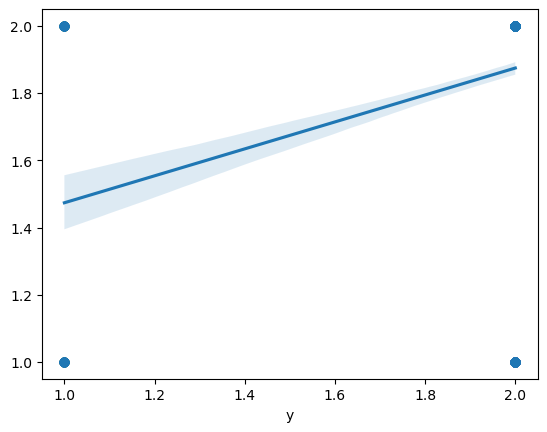

In [362]:
# Model Performance
sns.regplot(x = y_test,y= y_pred_DT)
plt.show()

In [363]:
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier 
RF = RandomForestClassifier().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

print(f'The accuracy score for Random Forest',accuracy_score(y_test,y_pred_RF))

The accuracy score for Random Forest 0.8695652173913043


In [371]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier().fit(X_train,y_train)
y_pred_SGD = SGD.predict(X_test)

print(f'The accuracy score for SGDClassifier',accuracy_score(y_test,y_pred_SGD))

The accuracy score for SGDClassifier 0.8246131171702284


In [373]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier().fit(X_train,y_train)
y_pred_GB = GB.predict(X_test)

print(f'The Accuracy score for GradientBoostingClassifier',accuracy_score(y_test,y_pred_GB))

The Accuracy score for GradientBoostingClassifier 0.8570375829034635


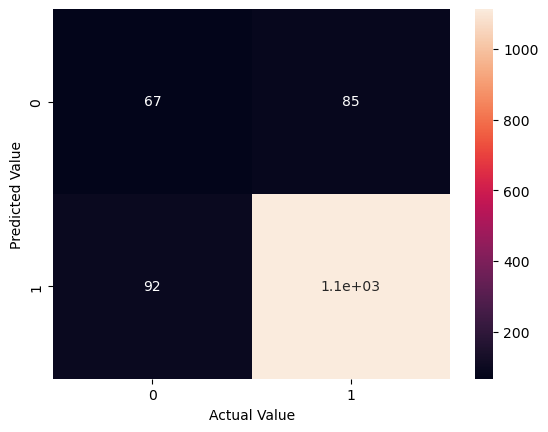

In [375]:
sns.heatmap(confusion_matrix(y_test,y_pred_RF),annot = True)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()